In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib
from sklearn.linear_model import LinearRegression
import preprocess as pp
import datetime
import matplotlib.pyplot as plt
import eda

In [2]:
features = pp.read_npy1('features_jan_2015.npy', features=True)

In [3]:
targets = pp.read_npy1('targets_jan_2015.npy', targets=True)

In [4]:
# want to use targets[3] fwd_r_1_10

In [5]:
# slice into one day
features_day = features.loc[(features['datetime'].dt.date >= datetime.date(2015, 1, 2)) & (features['datetime'].dt.date < datetime.date(2015, 1, 3))]
targets_day = targets.loc[(targets['datetime'].dt.date >= datetime.date(2015, 1, 2)) & (targets['datetime'].dt.date < datetime.date(2015, 1, 3))]

In [6]:
# how many stocks  
# 3140? not anymore, dropped regression weights and target NaNs
stocks = targets_day.loc[targets_day['squ']==22447]
len(features_day)/len(stocks)
stocks

,datetime,squ,y1,y2,y3,y4,y5,y6
0,2015-01-02 09:35:00-05:00,22447,-0.000918869,0.00118218,0.00327742,0.00329406,-0.000117147,0.00715376
2692,2015-01-02 09:40:00-05:00,22447,-0.00102989,0.00137603,0.00327742,0.00329406,-0.000467355,0.00691675
5387,2015-01-02 09:45:00-05:00,22447,-0.0031249,-0.00125543,0.00327742,0.00329406,0.00250584,0.0052166
8084,2015-01-02 09:50:00-05:00,22447,-0.00275467,-0.000118296,0.00327742,0.00329406,0.00140282,0.00565587
10782,2015-01-02 09:55:00-05:00,22447,-0.00171347,-0.000124335,0.00327742,0.00329406,0.00158942,0.0069149
...,...,...,...,...,...,...,...,...
2805652,2015-01-02 15:25:00-05:00,22447,-0.00103401,0.000578543,0.00327742,0.00329406,-0.00268907,0.00536805
2808353,2015-01-02 15:30:00-05:00,22447,-0.00344731,-0.000312344,0.00327742,0.00329406,NaN,0.00478047
2811054,2015-01-02 15:35:00-05:00,22447,NaN,-0.000947611,0.00327742,0.00329406,NaN,0.0046327
2813755,2015-01-02 15:40:00-05:00,22447,NaN,-0.00119156,0.00327742,0.00329406,NaN,0.00540236


In [8]:
# fwd_r_1_10_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0
targets_day.iloc[0:100,3]

0      0.00118218
1      0.00215772
2     -0.00370156
3      0.00320547
4     -0.00110624
         ...     
95    -0.00331899
96    0.000119852
97    -0.00307416
98     -0.0032668
99    -0.00216812
Name: fwd_r_1_10_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0, Length: 100, dtype: object

AttributeError: 'PathCollection' object has no attribute 'show'

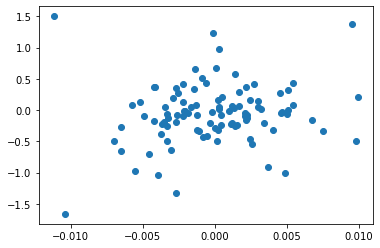

In [39]:
p = plt.scatter(targets_day.iloc[0:100,3],features_day.iloc[0:100,3])
p.show()

AttributeError: 'PathCollection' object has no attribute 'show'

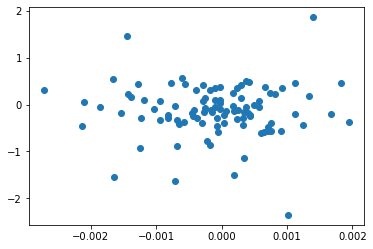

In [41]:
p = plt.scatter(targets_day.iloc[100000:100100,3],features_day.iloc[100000:100100,3])
p.show()

AttributeError: 'PathCollection' object has no attribute 'show'

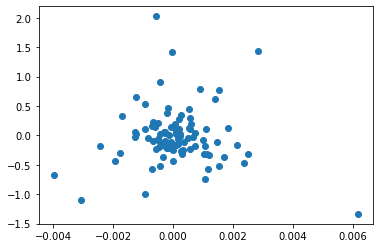

In [40]:
p = plt.scatter(targets_day.iloc[200000:200100,3],features_day.iloc[200000:200100,3])
p.show()

In [43]:
# needs to be changed to new labels
df = features_day.loc[:,"regression_weights":"ewma_intraday_return_E4S_hl30_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0_predictor"]
df["fwd_r_1_10_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0"] = targets_day["fwd_r_1_10_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0"]

In [44]:
# a couple features and the one target
df

,regression_weights,ewma_intraday_return_E4S_hl120_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0_predictor,ewma_intraday_return_E4S_hl30_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0_predictor,fwd_r_1_10_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0
0,-0.333554,-0.200409,-0.369476,0.00118218
1,-0.426219,0.36306,0.654204,0.00215772
2,2.74312,-0.380637,-0.663712,-0.00370156
3,3.19413,0.017292,0.0442264,0.00320547
4,2.11281,-0.326248,-0.558846,-0.00110624
...,...,...,...,...
2819152,-0.492509,-0.0933139,0.0541635,-0.00280078
2819153,-0.604168,-0.0333054,-0.432129,0.00180478
2819154,-0.218201,-0.326103,-0.51388,0.00433504
2819155,-0.480154,-0.458665,-0.254071,0.00175348


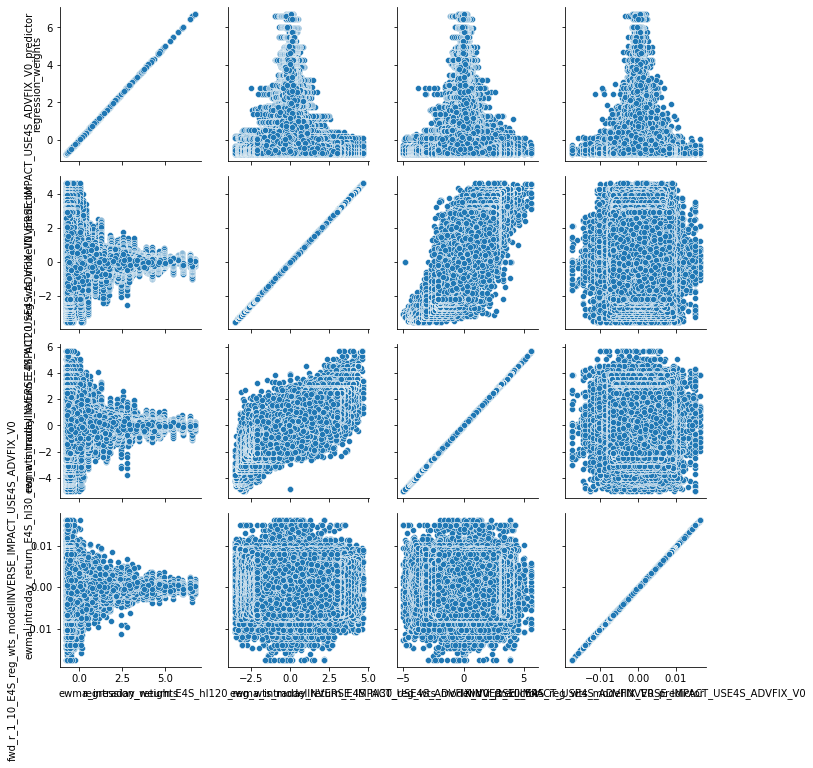

In [45]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [7]:
# next trading day

features_day_23 = features.loc[(features['datetime'].dt.date >= datetime.date(2015, 1, 23)) & (features['datetime'].dt.date < datetime.date(2015, 1, 24))]
targets_day_23 = targets.loc[(targets['datetime'].dt.date >= datetime.date(2015, 1, 23)) & (targets['datetime'].dt.date < datetime.date(2015, 1, 24))]

In [8]:
df_23 = features_day.loc[:,['squ','weights','z4']]
df_23["y2"] = targets_day["y2"]

In [9]:
df_23

In [10]:
g = sns.PairGrid(df_3)
g.map(sns.scatterplot)

NameError: name 'p' is not defined

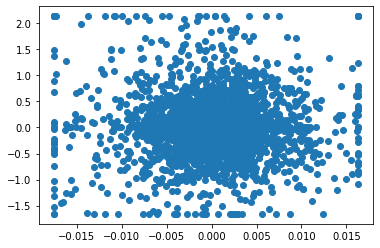

In [11]:
# plot all Z's against one target, find the strongeset correlations

a = plt.scatter(targets_day.iloc[0:2700,3],features_day.iloc[0:2700,3])
p.show()

In [12]:
# data frame with regression weights, wanted z, wanted target
# 2015_1_2
df_1 = features_day.loc[:,['squ','weights','z4']]
df_1["y2"] = targets_day["y2"]

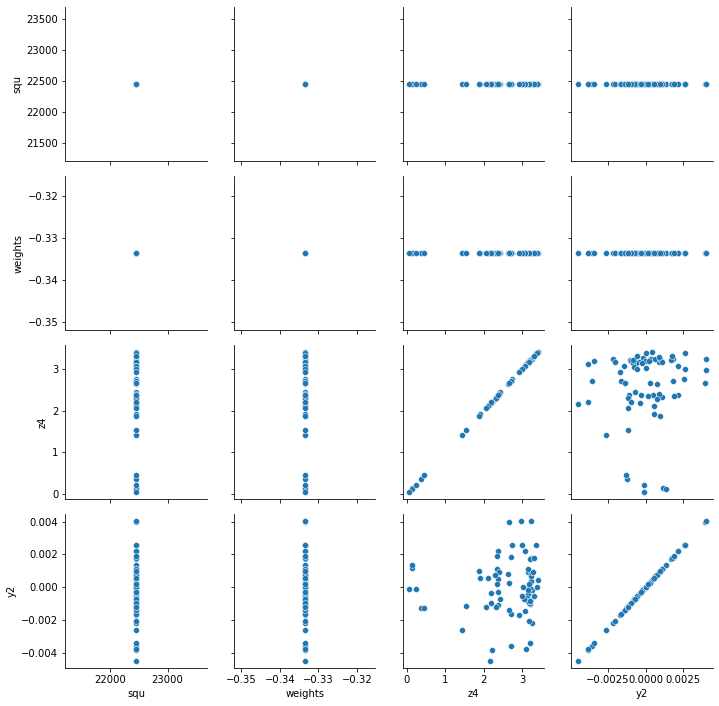

In [13]:
# one day 2015_1_2, one stock 22447, wanted z, wanted target
a = sns.PairGrid(df_1.loc[df_1['squ']==22447])
a.map(sns.scatterplot)

In [14]:
z1_22447 = df_1.loc[df_1['squ']==22447]['z4']
y1_22447 = df_1.loc[df_1['squ']==22447]['y2']

In [15]:
z1_22447.describe()

count     75.000000
unique    75.000000
top        3.126674
freq       1.000000
Name: z4, dtype: float64

In [16]:
z23_22449 = df_23.loc[df_1['squ']==22449]['z4']
y23_22449 = df_23.loc[df_1['squ']==22449]['y2']

0.007116960227142144
[[0.00017325]]


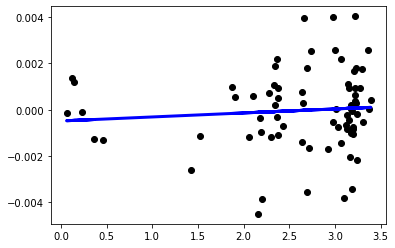

In [17]:
# linear regression
# want the largest score
# 2015_1_2 squ 22447
reg = LinearRegression().fit(np.array(z1_22447).reshape(-1,1), np.array(y1_22447).reshape(-1,1)) # shape (N,1)
y_pred = reg.predict(np.array(z1_22447).reshape(-1,1))
plt.scatter(np.array(z1_22447).reshape(-1,1),np.array(y1_22447).reshape(-1,1),  color='black')
plt.plot(np.array(z1_22447).reshape(-1,1), y_pred, color='blue', linewidth=3)
print(reg.score(np.array(z1_22447).reshape(-1,1), np.array(y1_22447).reshape(-1,1)))
print(reg.coef_)

0.005506871358410548
[[0.00020597]]


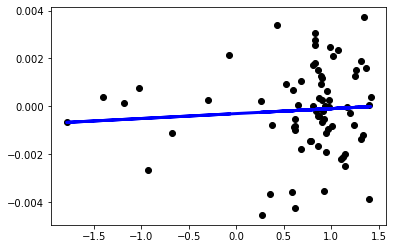

In [18]:
# 2015_1_23
# squ 22449
reg = LinearRegression().fit(np.array(z23_22449).reshape(-1,1), np.array(y23_22449).reshape(-1,1)) # shape (N,1)
y_pred = reg.predict(np.array(z23_22449).reshape(-1,1))
plt.scatter(np.array(z23_22449).reshape(-1,1),np.array(y23_22449).reshape(-1,1),  color='black')
plt.plot(np.array(z23_22449).reshape(-1,1), y_pred, color='blue', linewidth=3)
print(reg.score(np.array(z23_22449).reshape(-1,1), np.array(y23_22449).reshape(-1,1)))
print(reg.coef_)

In [19]:
features['squ'].unique()[1000]

25729

In [2]:
# pp.read_npy1 reads in with new labels
features_jan_2015 = pp.read_npy1('features_jan_2015.npy', features=True)

In [3]:
targets_jan_2015 = pp.read_npy1('targets_jan_2015.npy', targets=True)

In [23]:
# linear regression scores for a day / squ 
features_jan_13_2015_30127 = features.loc[(features['datetime'].dt.date >= datetime.date(2015, 1, 23))
                                                  & (features['datetime'].dt.date < datetime.date(2015, 1, 24))
                                                  & (features['squ'] == 30127)]

targets_jan_13_2015_30127 = targets.loc[(features['datetime'].dt.date >= datetime.date(2015, 1, 23))
                                                  & (features['datetime'].dt.date < datetime.date(2015, 1, 24))
                                                  & (features['squ'] == 30127)]

from sklearn.linear_model import LinearRegression

scores = []
for feature in features_jan_13_2015_30127.loc[:,'weights':'z15'].columns:
    reg = LinearRegression()
    reg.fit(np.array(features_jan_13_2015_30127[feature]).reshape(-1,1), np.array(targets_jan_13_2015_30127['y2']).reshape(-1,1))
    score = reg.score(np.array(features_jan_13_2015_30127[feature]).reshape(-1,1), np.array(targets_jan_13_2015_30127['y2']).reshape(-1,1))
    scores.append((feature,score))



In [24]:
# 5 highest features/ scores
def Sort_Tuple(scores): 
      
    # getting length of list of tuples
    lst = len(scores) 
    for i in range(0, lst): 
          
        for j in range(0, lst-i-1): 
            if (scores[j][1] > scores[j + 1][1]): 
                temp = scores[j] 
                scores[j]= scores[j + 1] 
                scores[j + 1]= temp 
    return scores  

In [25]:
Sort_Tuple(scores)[-5:]

[('x24', 0.17941999100836836),
 ('x11', 0.22027211566970895),
 ('x32', 0.24046684916762395),
 ('x10', 0.25603002893600246),
 ('x13', 0.259777659778788)]

R^2 scores for specific stocks on a specific day

squ = 30127

1/13/2015
[('x27', 0.011619365896258338),
 ('x32', 0.0200489926249785),
 ('z4', 0.054915122144264195),
 ('z4 x z15', 0.05582515753345341),
 ('z2 x z13', 0.05948983940437047)]
 1/14/15
 [('x32', -0.023279625015664163),
 ('x11', -0.021297807521169387),
 ('z7', -0.01613354339237505),
 ('z2', -0.015787473605374247),
 ('z6', -0.015360921322075338)]
 1/15/2015
 [('z4 x z13', 0.023521750879339165),
 ('z6 x z14', 0.030840921437647606),
 ('z2 x z13', 0.03664110369158868),
 ('z5 x z15', 0.041048967437544825),
 ('z5 x z14', 0.04668669665354619)]
 1/16/2015
 [('z9 x z15', -0.011095152305139688),
 ('z5 x z15', 0.009687071611601983),
 ('x13', 0.01640406934320282),
 ('x27', 0.021017074900360533),
 ('z5', 0.03491439033146526)]
 1/20/2015
 [('z14', -0.01309894273670853),
 ('z8 x z14', -0.013098942136512637),
 ('z12 x z14', -0.013098942033573646),
 ('z3 x z14', -0.013098942004469372),
 ('z5 x z14', -0.008369154503755638)]
 1/21/2015
 [('x32', 0.05368118839413316),
 ('x24', 0.16191208845612792),
 ('x10', 0.19578005980322377),
 ('x11', 0.2378583639307228),
 ('x13', 0.2432239556134017)]
 1/22/2015
 [('z6 x z15', 0.005445172731954773),
 ('z9', 0.006699838895084076),
 ('x4', 0.01404199040172538),
 ('z4', 0.030919752905798625),
 ('z2', 0.03674630902822318)]
 1/23/2015
 [('x6', 0.001062446105861703),
 ('z9', 0.0032851351297804587),
 ('x33', 0.01134207444532942),
 ('x7', 0.015977560843884242),
 ('x5', 0.029051884832035246)]

R^2 scores for specific stocks on a specific day

squ = 25729
x10-5, x1-4, x5-5, x11-2, x6-2, x27-4,

1/13/2015
[('x10', 0.14549536878616298),
 ('x5', 0.15107926264335247),
 ('x32', 0.17390768237151022),
 ('x6', 0.17655263418460632),
 ('x1', 0.18615470431632897)]
 
 1/14/2015
[('x27', 0.06741178066059361),
 ('z5', 0.08879671990372329),
 ('x13', 0.1025098262829256),
 ('z5 x z15', 0.1086923341331697),
 ('x24', 0.16452046144251176)]
 
 1/15/2015
 [('x10', 0.09188934229368362),
 ('z9', 0.09242158075304696),
 ('x27', 0.09898643214883396),
 ('x1', 0.11943322338459283),
 ('z11', 0.1390522381635535)]
 
 1/16/2015
 [('x3', 0.11186774400449062),
 ('x5', 0.12514716173480056),
 ('x1', 0.13741396787836813),
 ('x10', 0.16842214159248525),
 ('x13', 0.17899118803659697)]
 
 1/20/2015
 [('x5', 0.05118822929731304),
 ('x24', 0.06430817293918512),
 ('z5', 0.06896351353969887),
 ('x13', 0.13473521007166045),
 ('x10', 0.15010793832361735)]
 
 1/21/2015
 [('x6', 0.1268881273376461),
 ('x33', 0.14047922170997518),
 ('x10', 0.14332320006836152),
 ('x1', 0.1527365343493987),
 ('x2', 0.16156042740916954)]
 
 1/22/2015
 [('x31', 0.07114235459431428),
 ('x5', 0.0713233584705435),
 ('z2', 0.10114630342765552),
 ('x27', 0.11958184377454628),
 ('x11', 0.1648274895886701)]
 
 1/23/2015
 [('x31', 0.07114235459431428),
 ('x5', 0.0713233584705435),
 ('z2', 0.10114630342765552),
 ('x27', 0.11958184377454628),
 ('x11', 0.1648274895886701)]

In [29]:
# scores
# keep track of which features show up the most in the top 5 highest scores
for x in [5,6]:
    y =  eda.linreg(features, targets, 2015, 1, 13, 25729, uni=True, hour= x, minute=5)
   # list = list.append(y)
    print(y)

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [42]:
# early x6 x7 x34 x33 x30, per=3 x27 x32 x10 x1 x5
eda.linreg(features, targets, 2015, 1, 13, 25729, uni=True, hour=9, minute=35, period=3)

[('x27', 0.18800972963070073),
 ('x32', 0.2097111783226192),
 ('x10', 0.24997621154598226),
 ('x1', 0.2559813938431129),
 ('x5', 0.28212028924312016)]

In [46]:
# mid x2 x33 x1 x6 x7 so much higher, per=3 x33 x1 x32 x7 x6
eda.linreg(features, targets, 2015, 1, 13, 25729, uni=True, hour=12, minute=35, period=1)

[('x2', 0.5717704175001792),
 ('x33', 0.5955739249519789),
 ('x1', 0.6374246063896045),
 ('x6', 0.6567061109704236),
 ('x7', 0.6824267583083098)]

0.6824267583083098
[[-0.00494997]]


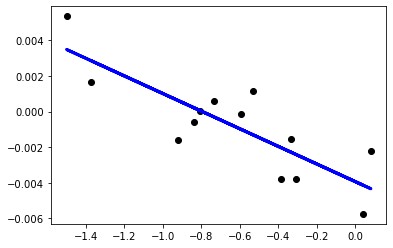

In [48]:
# graph linear regression of squ = 25729 2015_1_13 12:35-1:40 
features_13 = features_jan_2015.loc[(features_jan_2015['datetime'].dt.date >= datetime.date(2015, 1, 13))
                                           & (features_jan_2015['datetime'].dt.date < datetime.date(2015, 1, 13+1))
                                           & (features_jan_2015['datetime'].dt.time >= datetime.time(12, 35))
                                           & (features_jan_2015['datetime'].dt.time < datetime.time(12+1, 35+5))
                                           & (features_jan_2015['squ'] == 25729)]
targets_13 = targets_jan_2015.loc[(targets_jan_2015['datetime'].dt.date >= datetime.date(2015, 1, 13))
                                           & (targets_jan_2015['datetime'].dt.date < datetime.date(2015, 1, 13+1))
                                           & (targets_jan_2015['datetime'].dt.time >= datetime.time(12, 35))
                                           & (targets_jan_2015['datetime'].dt.time < datetime.time(12+1, 35+5))
                                           & (features_jan_2015['squ'] == 25729)]

df_13 = features_13.loc[:,['squ','weights','x7']]
df_13["y2"] = targets_13["y2"]

z13_25729 = df_13.loc[df_13['squ']==25729]['x7']
y13_25729 = df_13.loc[df_13['squ']==25729]['y2']

reg = LinearRegression().fit(np.array(z13_25729).reshape(-1,1), np.array(y13_25729).reshape(-1,1)) # shape (N,1)
y_pred = reg.predict(np.array(z13_25729).reshape(-1,1))
plt.scatter(np.array(z13_25729).reshape(-1,1),np.array(y13_25729).reshape(-1,1),  color='black')
plt.plot(np.array(z13_25729).reshape(-1,1), y_pred, color='blue', linewidth=3)
print(reg.score(np.array(z13_25729).reshape(-1,1), np.array(y13_25729).reshape(-1,1)))
print(reg.coef_)

In [45]:
#late z7z15 z5z15 x27 z6z15 x5
eda.linreg(features, targets, 2015, 1, 13, 25729, uni=True, hour=14, minute=50, period=1)

[('z7 x z15', 0.4375043063672007),
 ('z5 x z15', 0.43999701427131155),
 ('x27', 0.4591810528587359),
 ('z6 x z15', 0.49709153360201774),
 ('x5', 0.6076581449930448)]

In [41]:
eda.linreg(features, targets, 2015, 1, 13, 25729, uni=True)

[('x10', 0.14549536878616298),
 ('x5', 0.15107926264335247),
 ('x32', 0.17390768237151022),
 ('x6', 0.17655263418460632),
 ('x1', 0.18615470431632897)]

In [37]:
eda.linreg(features, targets, 2015, 1, 13, 25729, uni=True, hour=10, minute=5, period=4)

[('x5', 0.16048713683261062),
 ('x33', 0.19081990329964937),
 ('z5', 0.2332623089528807),
 ('x10', 0.25860445601373594),
 ('x1', 0.2920805917094823)]